In [2]:
import pandas as pd
census = pd.read_csv('/content/census_data.csv')
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [4]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import LabelEncoder
labelencode_X = LabelEncoder()
census = census.apply(LabelEncoder().fit_transform)

x_train = census[census.flag==1].drop(['y','flag'], axis=1)
y_train = census[census.flag==1]['y']
x_test = census[census.flag==0].drop(['y','flag'], axis=1)
y_test = census[census.flag==0]['y']

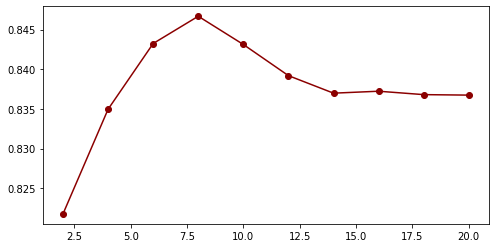

In [5]:
#2. find optimal value of a key Hyper-parameter
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
  
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color = 'darkred', marker = 'o')
plt.show()

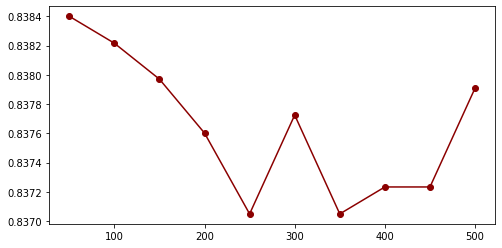

In [6]:
#3. Building a Random Forest Model
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = RandomForestClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
  
plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = 'darkred', marker = 'o')
plt.show()

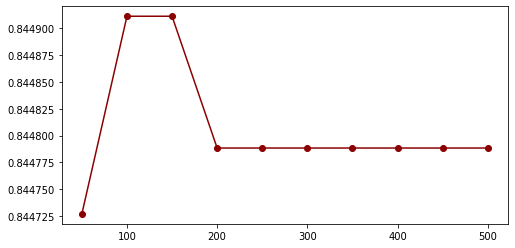

In [7]:
#4. AdaBoost Model
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = AdaBoostClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
  
plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = 'darkred', marker = 'o')
plt.show()

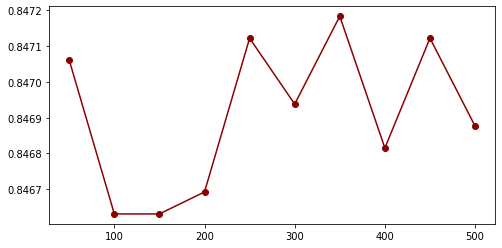

In [8]:
#Gradient Model
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
  
plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = 'darkred', marker = 'o')
plt.show()

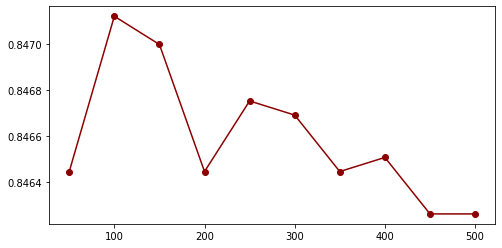

In [9]:
#XGB Model
results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = XGBClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
  
plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color = 'darkred', marker = 'o')
plt.show()

In [11]:
#5. Compare performace
n_estimator = [100]
for trees in n_estimator:

  #Random Forest
  model_RF = RandomForestClassifier(random_state = 101, n_estimators=trees)
  model_RF.fit(x_train, y_train)
  y_pred_RF = model_RF.predict(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
  auc_RF = auc(fpr, tpr)
  accuracy_RF = np.mean(y_test == y_pred_RF)

  #AdaBoost
  model_AB = AdaBoostClassifier(random_state = 101, n_estimators=trees)
  model_AB.fit(x_train, y_train)
  y_pred_AB = model_AB.predict(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_AB)
  auc_AB = auc(fpr, tpr)
  accuracy_AB = np.mean(y_test == y_pred_AB)

  #Gradient Boost
  model_GB = GradientBoostingClassifier(random_state = 101, n_estimators=trees)
  model_GB.fit(x_train, y_train)
  y_pred_GB = model_GB.predict(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_GB)
  auc_GB = auc(fpr, tpr)
  accuracy_GB = np.mean(y_test == y_pred_GB)

  #XGB
  model_XGB= XGBClassifier(random_state = 101, n_estimators=trees)
  model_XGB.fit(x_train, y_train)
  y_pred_XGB = model_XGB.predict(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB)
  auc_XGB = auc(fpr, tpr)
  accuracy_XGB = np.mean(y_test == y_pred_XGB)

  data = {'Random Forest': (accuracy_RF, auc_RF, trees), 
          'AdaBoost': (accuracy_AB, auc_AB, trees),
          'Gradient Boost': (accuracy_GB, auc_GB, trees),
          'XGB': (accuracy_XGB, auc_XGB, trees),}
  compare_table = pd.DataFrame(data, index= ('Accuracy', 'AUC', 'Hyper-parameters'))

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838216,0.844911,0.846631,0.847122
AUC,0.747542,0.746088,0.756732,0.756785
Hyper-parameters,100.000000,100.000000,100.000000,100.000000
